In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [12]:
NxN = pd.read_csv('../../extracted_data/NxN_imputed_10.csv', sep = ',', index_col = 0)

In [13]:
embeddings = pd.read_csv('../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
embeddings = embeddings.reset_index().set_index('gene_id')
NxN_embeddings = NxN.merge(embeddings, on='gene_id', how='inner')

R2:  0.13554465593377196
RMSE: 0.08520881526129358


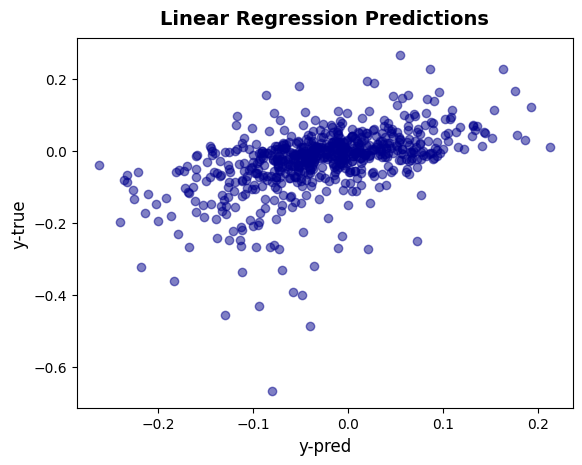

In [14]:
random.seed(41)

target_column = random.choice(NxN.columns)  # Randomly pick a column name

X = NxN_embeddings.drop(columns=[target_column])  # Features (all columns except the target)
y = NxN_embeddings[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

In [15]:
print(target_column)

DMA_YAR029W


0.9999953207206064


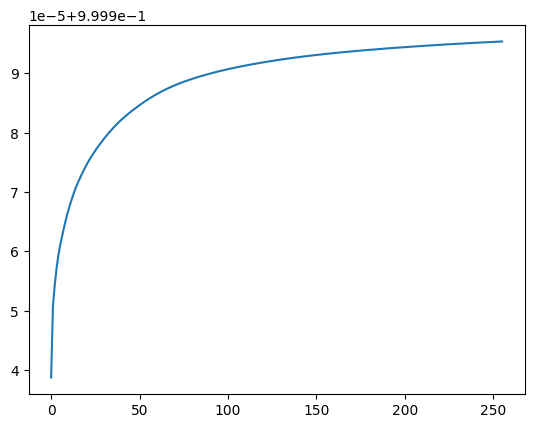

In [16]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [17]:
dims = 1024
NxN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
NxN_PCA

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,3019.431404,6.065576,-5.147876,-3.419265,-0.721193,-1.988297,-0.882974,-0.594064,-1.595835,-0.273052,...,0.095696,-0.032372,0.090078,-0.055921,0.013811,0.079215,-0.017168,0.117363,-0.145091,-0.035352
1,-2302.567950,-7.132739,-1.342886,3.551012,-1.261107,-2.070610,-0.881785,-0.135971,-1.013532,-0.890186,...,0.025642,-0.089688,0.033559,-0.008748,-0.041200,-0.078952,-0.149654,0.036420,-0.117779,-0.032691
2,-2277.567797,-5.201636,-0.357325,4.048265,1.095225,-2.972496,-2.640811,-2.973126,-1.334899,-0.928267,...,-0.084583,0.106093,-0.135742,0.005922,0.037132,-0.011158,-0.045927,0.114205,-0.034796,0.118334
3,2760.432078,-6.552769,-1.209331,-2.843417,0.312523,-1.400211,-4.555097,-0.497817,-0.776272,-0.814131,...,0.086206,-0.039552,0.043781,0.027556,0.126991,-0.023107,-0.100793,-0.013063,-0.035315,0.004661
4,-2858.567878,-8.005638,-1.346400,1.011123,0.170022,-4.459569,-0.062409,-1.902760,-1.017985,-2.522766,...,0.102410,0.024268,-0.062460,0.000099,-0.056315,-0.038317,0.051487,0.107234,0.091254,0.046776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,-833.567798,-9.911309,2.316468,-1.760054,2.457143,4.996133,-0.523004,-0.520449,2.925312,-0.021450,...,-0.052356,-0.117891,0.062652,-0.021534,-0.021921,-0.310127,0.015829,-0.125083,-0.093704,-0.064303
3266,967.431557,1.839791,4.633864,2.742628,3.512326,1.836858,-0.943469,1.428781,-0.620102,1.496778,...,0.133472,-0.088486,-0.088861,0.031863,0.138710,0.137367,0.056169,0.044698,0.229132,0.079034
3267,470.431622,-0.971799,-2.227562,-2.638216,4.531935,3.808477,-1.231544,-1.395079,0.866359,-2.755367,...,-0.060457,0.155846,-0.103194,0.052811,0.062116,0.117830,0.008232,0.042987,-0.032362,-0.157959
3268,-3179.567881,-7.922794,3.455442,-7.238769,-1.023973,1.804116,-2.623179,0.355187,1.336692,-0.899995,...,-0.014346,0.143351,0.136197,0.053053,-0.154254,0.113453,-0.027057,-0.055558,-0.041175,-0.051508


R2:  0.12286845358901788
RMSE: 0.08583128424012573


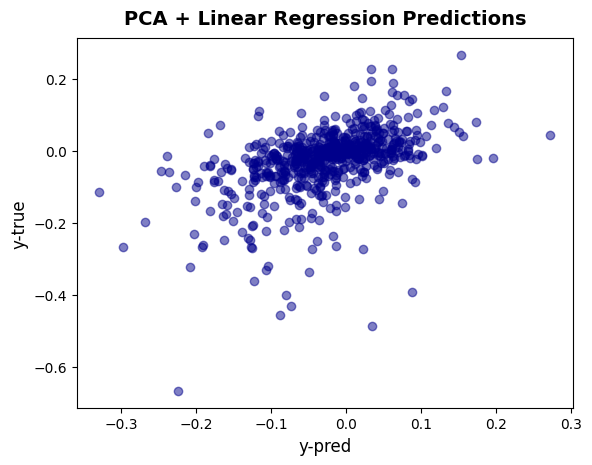

In [18]:
X_train, X_test, y_train, y_test = train_test_split(NxN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

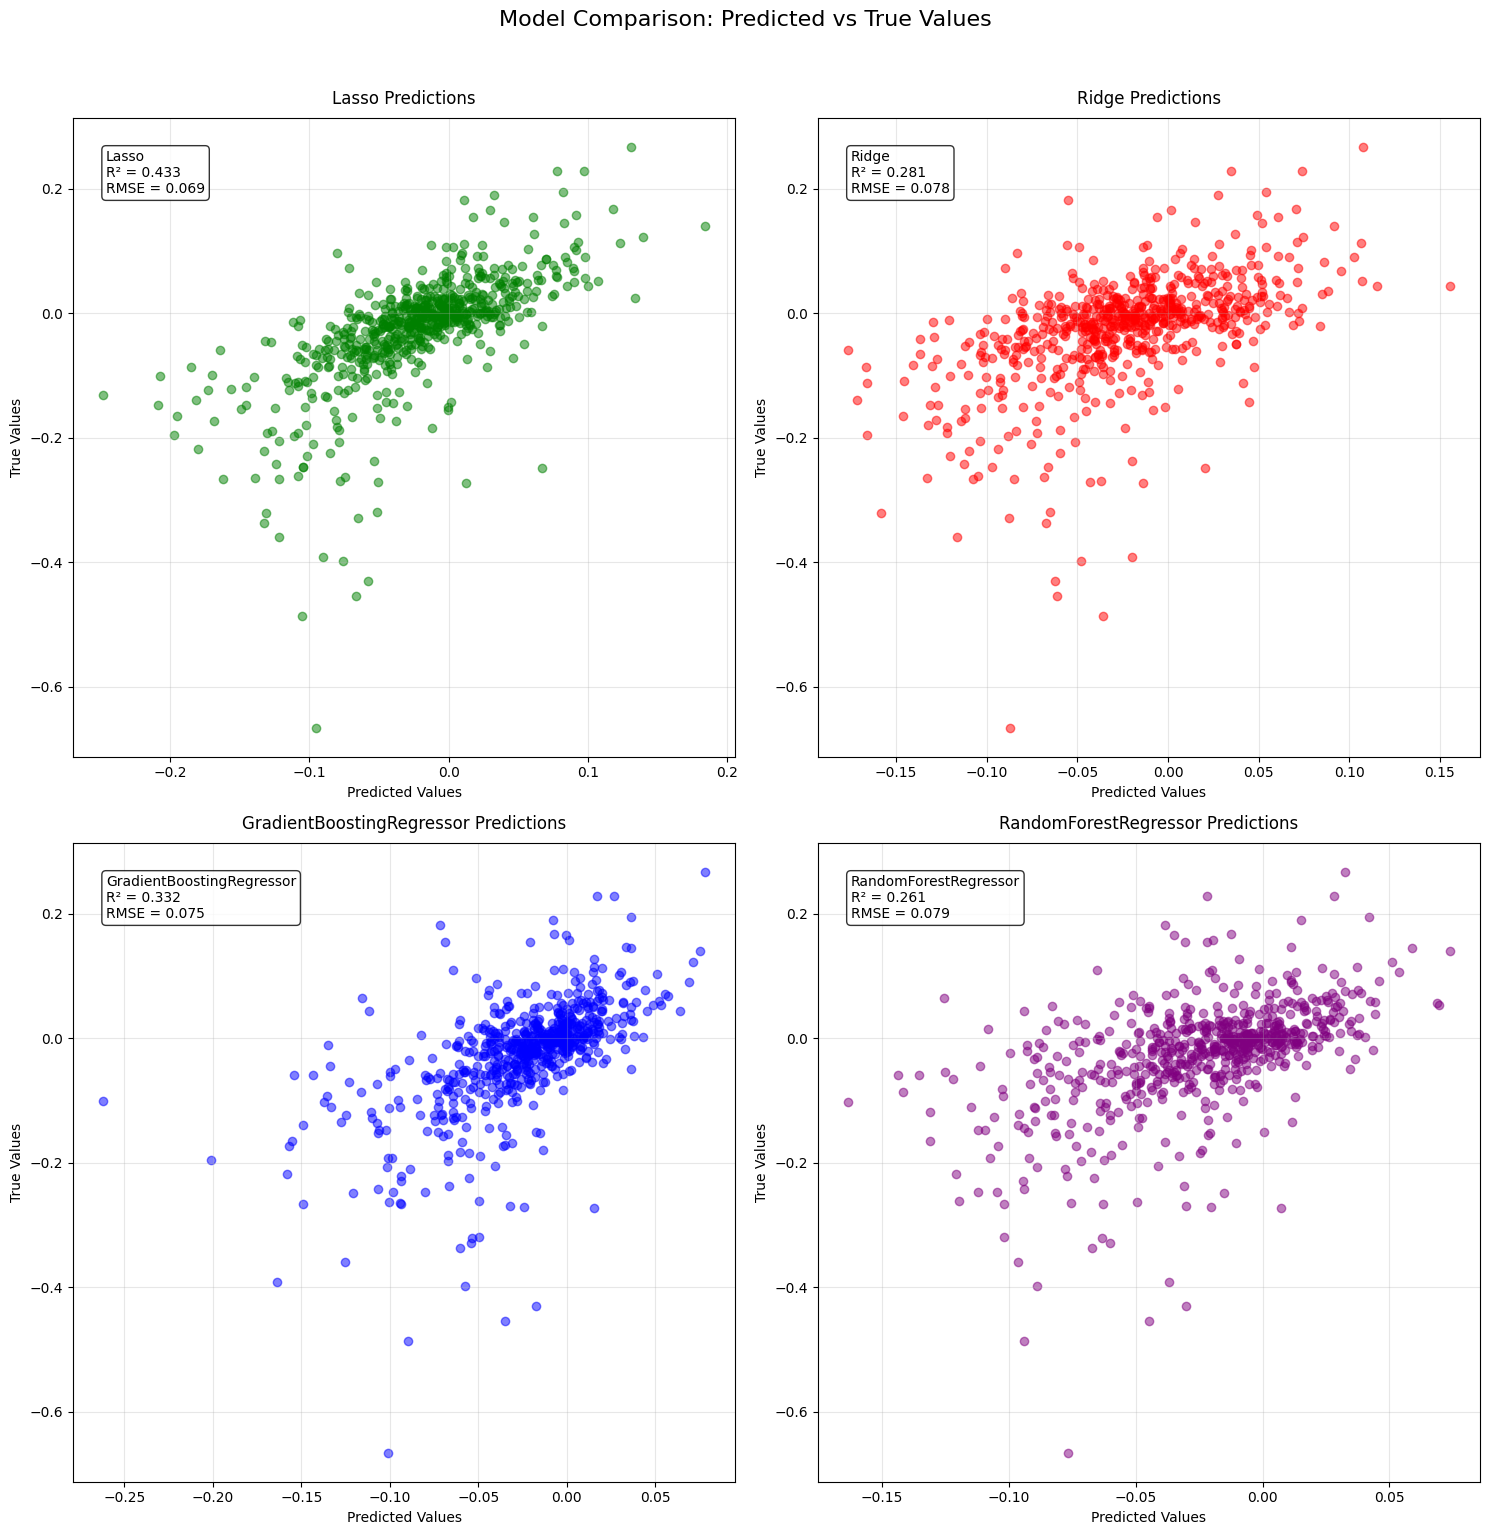

In [19]:
predictive_models = [ 
                      Lasso(alpha=0.0001), 
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42),

]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45.8210 - mse: 45.8210 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - mse

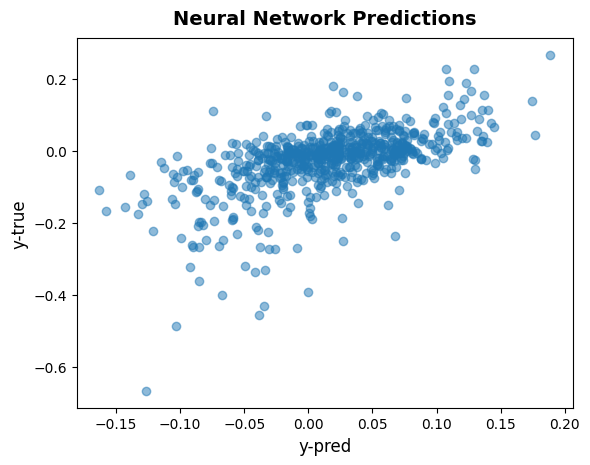

In [20]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()